In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
mydata=datasets.load_diabetes()

x, y = mydata.data, mydata.target

In [4]:
# Concat the data 

x = pd.DataFrame(data=x)
y = pd.DataFrame(data=y)

frames = [x,y]
result = pd.concat(frames,1)

In [5]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
training_data, testing_data = train_test_split(result, test_size = 0.2, random_state = 0)

C:\Users\shari\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#Summary

result.describe()

,0,1,2,3,4,5,6,7,8,9,0
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [7]:
#Missing values

print(x.isnull().values.any())
print(y.isnull().values.any())

False
False


### Visualize The Data

C:\Users\shari\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B699AB1B70>,
      dtype=object)

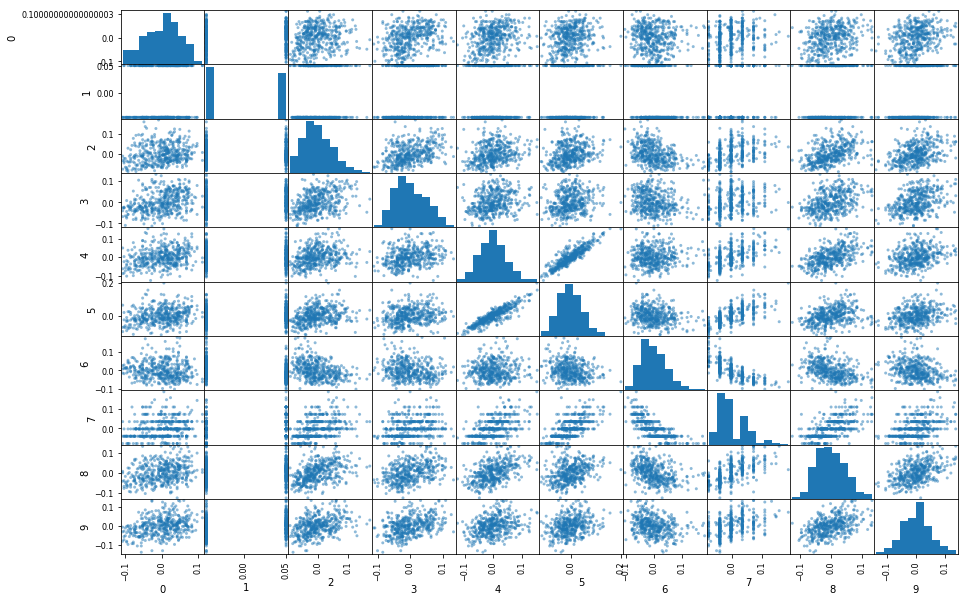

In [8]:
# To Visualize the data  

%matplotlib inline 
from pandas.tools.plotting import scatter_matrix
pd.scatter_matrix(x, figsize =(15,10))

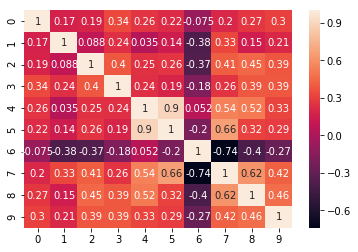

In [9]:
# Correlation between the variables 

corr = x.corr()
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

## Default Regression Tree 

In [10]:
# Model Fitting

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])

# Predicting a new result

predicted_train = regressor.predict(training_data.iloc[:,:-1])
predicted_test = regressor.predict(testing_data.iloc[:,:-1])




In [11]:
# Calculate RMSEs

RMSE_train = np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1])))
RMSE_test = np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1])))

print (RMSE_train)
print (RMSE_test)


0.0
83.70930169946011


In [12]:
# Calculate MAPE 


MAPE_train = (np.sum(abs(((training_data.iloc[:,-1]-predicted_train))/(training_data.iloc[:,-1]))))/len(training_data.iloc[:,-1])
MAPE_test = (np.sum(abs(((testing_data.iloc[:,-1]-predicted_test))/(testing_data.iloc[:,-1]))))/len(testing_data.iloc[:,-1])
print(MAPE_train)
print(MAPE_test)

0.0
0.5801041529425043


# Residual Analysis on Variance - Original Data 

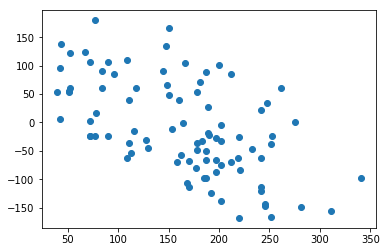

In [13]:
residual0 = testing_data.iloc[:,-1]-predicted_test

plt.scatter(predicted_test, residual0)
plt.show()

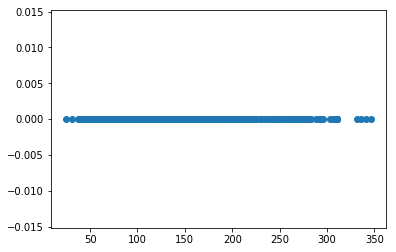

In [14]:
residual01 = training_data.iloc[:,-1]-predicted_train

plt.scatter(predicted_train, residual01)
plt.show()

It is very clear that the data is overfitting. Also there seems to be an instability in variance. We now perform grid search to select the hyperparameters for avoiding the overfit.

## Selecting the Range for Parameters in Grid Search

The various parameters studied for the optimal regression tree are 

Min_Samples_Leaf,
Max_Depth,
Min_Samples_Split,
Max_Features,
Max_Leaf_Nodes

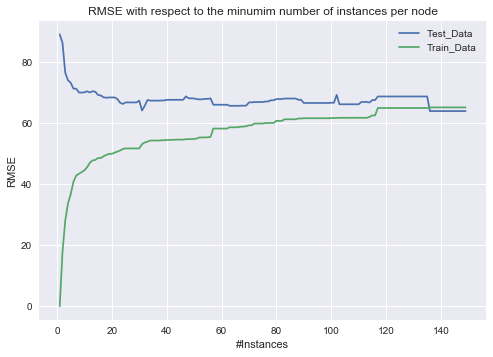

In [13]:
# Min Samples Leaf

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,150):
   
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))
   
ax0.plot(range(1,150),RMSE_test,label='Test_Data')
ax0.plot(range(1,150),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


A range between 100 and 135 for Min_Samples_Leaf could yield a better result, because the RMSE of Training and Testing data seems to be close to each other. Also, We see that beyond 135, the RMSE for test and train seems to be constant.

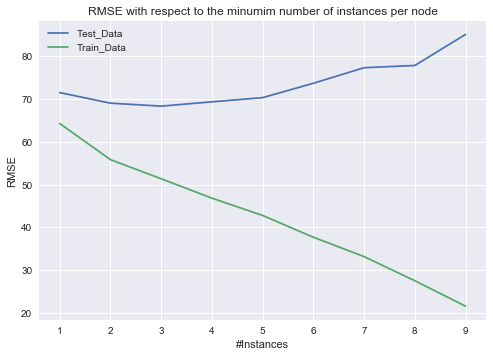

In [14]:
# Max Depth

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,10):

    regression_model = DecisionTreeRegressor(criterion="mse",max_depth=i)   
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])
  
    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))
   
ax0.plot(range(1,10),RMSE_test,label='Test_Data')
ax0.plot(range(1,10),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


A range between 1 to 5 for Max_Depth could yield a better result, because beyond that the RMSE seems to vary largely. 

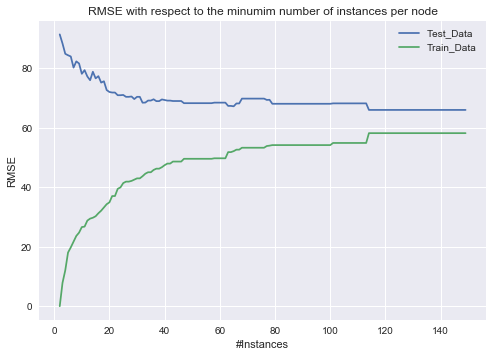

In [15]:
# Min Sample Split

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(2,150):

    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_split=i)   
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])
   
    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))
   
ax0.plot(range(2,150),RMSE_test,label='Test_Data')
ax0.plot(range(2,150),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

A range between 80 and 110 for Min_Samples_Split could yield a better result, because the RMSE of Training and Testing data seems to be close to each other. Also, We see that beyond 115, the RMSE for test and train seems to be constant.

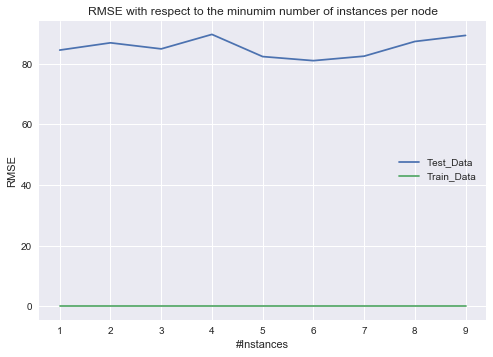

In [16]:
# Max Features

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,10):

    regression_model = DecisionTreeRegressor(criterion="mse",max_features=i)   
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])
  
    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))
   
ax0.plot(range(1,10),RMSE_test,label='Test_Data')
ax0.plot(range(1,10),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


It is evdient that the Max_Features doesn't have any impact on RMSE

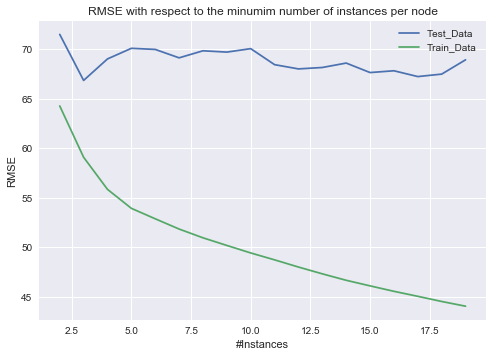

In [17]:
# Max Leaf Nodes

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(2,20):
   
    regression_model = DecisionTreeRegressor(criterion="mse",max_leaf_nodes=i)   
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])
    
    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))
   
ax0.plot(range(2,20),RMSE_test,label='Test_Data')
ax0.plot(range(2,20),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()
































A range between 2 to 10 for Max_Leaf_Nodes could yield a better result, because beyond that the RMSE seems to vary largely. 


## Grid Search on the Range of Hyperparameters Obtained

In [58]:
# Grid Search

from sklearn.model_selection import GridSearchCV
best =  DecisionTreeRegressor(random_state=0)
regressor2 =  GridSearchCV(best, {"min_samples_leaf": range(100, 135, 2),
                                 "max_depth": np.arange(1, 5), 
                                 "min_samples_split": range(80, 110, 2),
                                 "max_leaf_nodes": range(2, 10, 2)})

regressor2.fit(training_data.iloc[:,:-1], training_data.iloc[:,-1])    
print('Best Parameters:{}'.format(regressor2.best_params_))
print(regressor2.best_params_)

Best Parameters:{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 102, 'min_samples_split': 80}
{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 102, 'min_samples_split': 80}


In [59]:
# Predicting a new result

predicted_train = regressor2.predict(training_data.iloc[:,:-1])
predicted_test = regressor2.predict(testing_data.iloc[:,:-1])

# Calculate RMSEs

RMSE2_train = np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1])))
RMSE2_test = np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1])))

print (RMSE2_train)
print (RMSE2_test)


64.2717091081
71.503309867


In [60]:
# Calculate MAPE 


MAPE2_train = (np.sum(abs(((training_data.iloc[:,-1]-predicted_train))/(training_data.iloc[:,-1]))))/len(training_data.iloc[:,-1])
MAPE2_test = (np.sum(abs(((testing_data.iloc[:,-1]-predicted_test))/(testing_data.iloc[:,-1]))))/len(testing_data.iloc[:,-1])
print(MAPE2_train)
print(MAPE2_test)

0.48691632461292894
0.4793717496795754


Here we see that RMSE of test data to be 71. To comment more about the model, we obtain the Mean Absolute Percentage Error. We see that MAPE is 47%. So there are options that we can still improvise the model 

# Residual Analysis on Variance - Original Data after Grid Search 

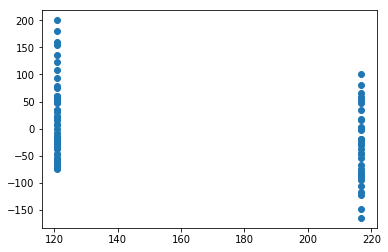

In [46]:
residual = testing_data.iloc[:,-1]-predicted_test

plt.scatter(predicted_test, residual)
plt.show()

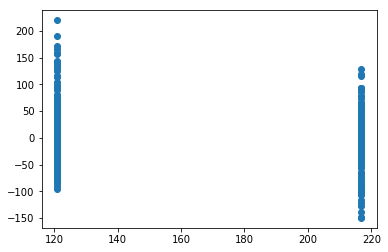

In [61]:
residual4 = training_data.iloc[:,-1]-predicted_train

plt.scatter(predicted_train, residual4)
plt.show()

## Default Regression on Log Transformed Data 

In [11]:
Y= np.log(y)

In [12]:
frames2 = [x,Y]
result2 = pd.concat(frames2,1)
print(result2.head())

          0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

          7         8         9         0  
0 -0.002592  0.019908 -0.017646  5.017280  
1 -0.039493 -0.068330 -0.092204  4.317488  
2 -0.002592  0.002864 -0.025930  4.948760  
3  0.034309  0.022692 -0.009362  5.327876  
4 -0.002592 -0.031991 -0.046641  4.905275  


In [13]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
training_data2, testing_data2 = train_test_split(result2, test_size = 0.2, random_state = 0)

In [14]:
# Model Fitting

from sklearn.tree import DecisionTreeRegressor
regressor7 = DecisionTreeRegressor(random_state = 0)
regressor7.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])

# Predicting a new result

predicted_train = regressor7.predict(training_data2.iloc[:,:-1])
predicted_test = regressor7.predict(testing_data2.iloc[:,:-1])

In [19]:
# Calculate RMSEs

RMSE7_train = np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1])))
RMSE7_test = np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1])))

print (RMSE7_train)
print (RMSE7_test)

0.0
0.5749255923831349


In [20]:
# Calculate MAPE 


MAPE7_train = (np.sum(abs(((training_data2.iloc[:,-1]-predicted_train))/(training_data2.iloc[:,-1]))))/len(training_data2.iloc[:,-1])
MAPE7_test = (np.sum(abs(((testing_data2.iloc[:,-1]-predicted_test))/(testing_data2.iloc[:,-1]))))/len(testing_data2.iloc[:,-1])
print(MAPE7_train)
print(MAPE7_test)

0.0
0.09498283540799814


# Residual Analysis on Variance - Log Transformed Data

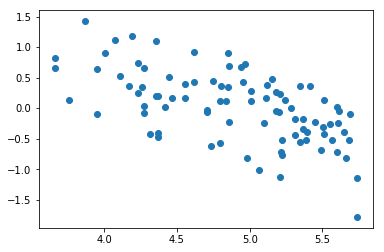

In [21]:
residual1 = testing_data2.iloc[:,-1]-predicted_test

plt.scatter(predicted_test, residual1)
plt.show()

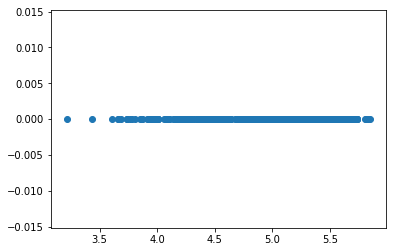

In [22]:
residual21 = training_data2.iloc[:,-1]-predicted_train

plt.scatter(predicted_train, residual21)
plt.show()

We compare the residual plots of the original data and the log transformed data. We see that we are able to stabilize the variance. But, the log transformed data is overfitting the model. So we do grid search to select the parameters. 

Now we perform the Grid Search on Log Transformed Data for Better Result and to avoid overfitting 

## Selecting the Range for Parameters in Grid Search for Log Transformed Value

The various parameters studied for the optimal regression tree are 

Min_Samples_Leaf,
Max_Depth,
Min_Samples_Split,
Max_Features,
Max_Leaf_Nodes

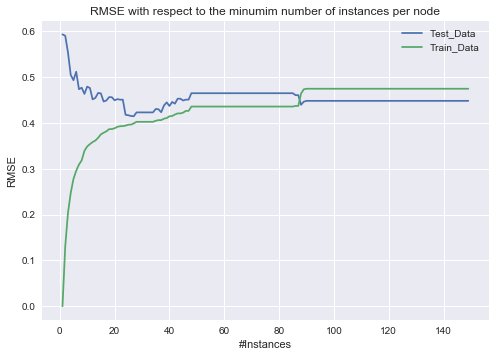

In [27]:
# Min Samples Leaf

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,150):
   
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(1,150),RMSE_test,label='Test_Data')
ax0.plot(range(1,150),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


A range between 20 and 45 for Min_Samples_Leaf could yield a better result, because the RMSE of Training and Testing data seems to be close to each other. Also, We see that beyond 85, the RMSE for test and train seems to be constant.


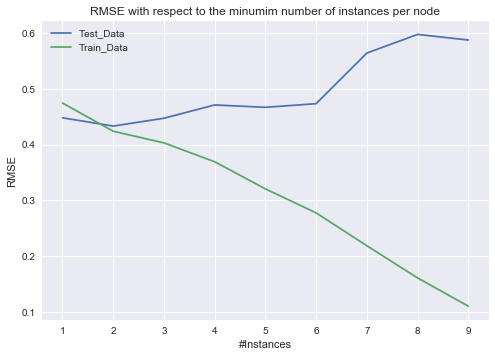

In [30]:
# Max Depth

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,10):
   
    regression_model = DecisionTreeRegressor(criterion="mse",max_depth=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(1,10),RMSE_test,label='Test_Data')
ax0.plot(range(1,10),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

































A range between 1 to 3 for Max_Depth could yield a better result, because beyond that the RMSE seems to vary largely


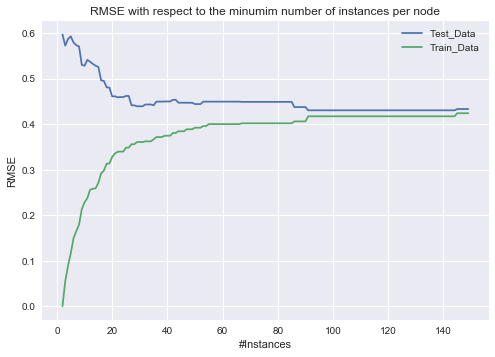

In [32]:
# Min Samples Split 

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(2,150):
   
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_split=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(2,150),RMSE_test,label='Test_Data')
ax0.plot(range(2,150),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


A range between 60 and 95 for Min_Samples_Split could yield a better result, because the RMSE of Training and Testing data seems to be close to each other. Also, We see that beyond 95, the RMSE for test and train seems to be constant.

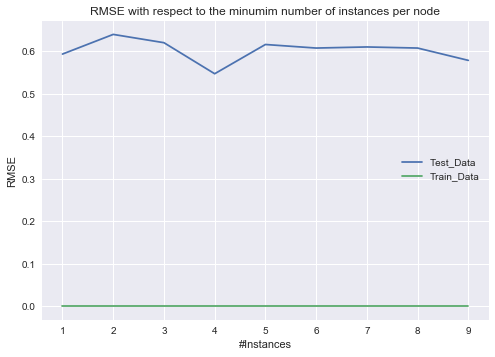

In [33]:
# Max Features

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,10):
   
    regression_model = DecisionTreeRegressor(criterion="mse",max_features=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(1,10),RMSE_test,label='Test_Data')
ax0.plot(range(1,10),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()



It is evdient that the Max_Features doesn't have any impact on RMSE. But Max Features = 4, seems to perform better


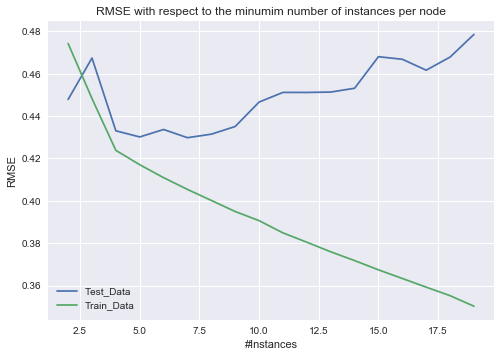

In [34]:
# Max Leaf Nodes

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(2,20):
   
    regression_model = DecisionTreeRegressor(criterion="mse", max_leaf_nodes=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(2,20),RMSE_test,label='Test_Data')
ax0.plot(range(2,20),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


A range between 2 to 8 for Max_Leaf_Nodes could yield a better result, because beyond that the RMSE seems to vary largely.

## Grid Search on the Range of Hyperparameters Obtained

In [94]:
# Grid Search

from sklearn.model_selection import GridSearchCV
best =  DecisionTreeRegressor(random_state=0,max_features=4 )
regressor2 =  GridSearchCV(best, {"min_samples_leaf": range(20, 45, 2),
                                  "max_depth": np.arange(1, 3),
                                 "min_samples_split": range(60, 95, 2),
                                 "max_leaf_nodes": range(2, 8, 1)})

regressor2.fit(training_data2.iloc[:,:-1], training_data2.iloc[:,-1])    
print('Best Parameters:{}'.format(regressor2.best_params_))
print(regressor2.best_params_)

Best Parameters:{'max_depth': 2, 'max_leaf_nodes': 6, 'min_samples_leaf': 28, 'min_samples_split': 60}
{'max_depth': 2, 'max_leaf_nodes': 6, 'min_samples_leaf': 28, 'min_samples_split': 60}


In [95]:
# Predicting a new result

predicted_train = regressor2.predict(training_data2.iloc[:,:-1])
predicted_test = regressor2.predict(testing_data2.iloc[:,:-1])

# Calculate RMSEs

RMSE2_train = np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1])))
RMSE2_test = np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1])))

print (RMSE2_train)
print (RMSE2_test)


0.442734999345
0.485606152378


In [96]:
# Calculate MAPE 


MAPE2_train = (np.sum(abs(((training_data2.iloc[:,-1]-predicted_train))/(training_data2.iloc[:,-1]))))/len(training_data2.iloc[:,-1])
MAPE2_test = (np.sum(abs(((testing_data2.iloc[:,-1]-predicted_test))/(testing_data2.iloc[:,-1]))))/len(testing_data2.iloc[:,-1])
print(MAPE2_train)
print(MAPE2_test)

0.07608453617686686
0.08196398739619343


# Residual Analysis on Variance - Log Transformed Data after Grid Search 

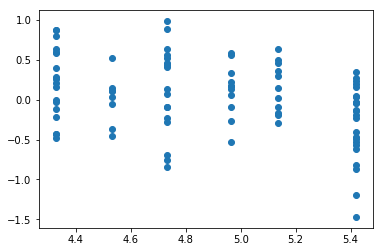

In [75]:
residual1 = testing_data2.iloc[:,-1]-predicted_test

plt.scatter(predicted_test, residual1)
plt.show()

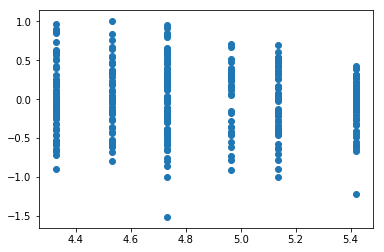

In [77]:
residual2 = training_data2.iloc[:,-1]-predicted_train

plt.scatter(predicted_train, residual2)
plt.show()

# Eliminating Multicollinearity

From the Multicollinearity test which was conducted before, we were able to find that the variables 4 and 5 are correlated. Also the variables 7 is correlated with 5,6 and 8 which is indicated by higher correlation values. So some of these values needs to be removed.

## Validating Multicollinearity by performing an OLS test

In [15]:
# Estimatation 

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

x1 = sm.add_constant(x)
est = sm.OLS(Y, x1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     40.46
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           5.84e-56
Time:                        16:41:40   Log-Likelihood:                -222.99
No. Observations:                 442   AIC:                             468.0
Df Residuals:                     431   BIC:                             513.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8813      0.019    252.877      0.0

From this, we can say that the variables 4 and 5 have high p--values. Also the variables 6 and 7 have high p-values. So here we will remove variable 5 since it has a higher p-value than variable 4. THen we will also remove variable 7 since it has a higher p-value than 6. Besides, variable 7 is correlated with multiple values. So removing variables 5 and 7.

# Removing variables showing Multicollinearity

In [16]:
result2=result2.drop([5, 7], axis=1)

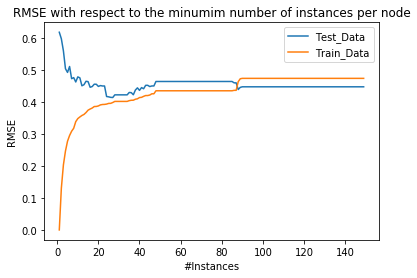

In [17]:
# Min Samples Leaf

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,150):
   
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(1,150),RMSE_test,label='Test_Data')
ax0.plot(range(1,150),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


































A range between 20 and 45 for Min_Samples_Leaf could yield a better result, because the RMSE of Training and Testing data seems to be close to each other. Also, We see that beyond 85, the RMSE for test and train seems to be constant.


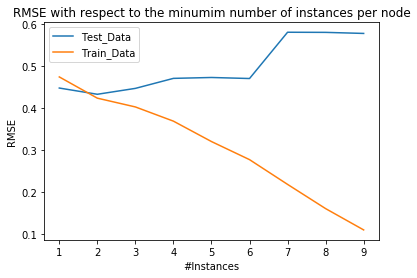

In [18]:
# Max Depth

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,10):
   
    regression_model = DecisionTreeRegressor(criterion="mse",max_depth=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(1,10),RMSE_test,label='Test_Data')
ax0.plot(range(1,10),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

































































A range between 1 to 3 for Max_Depth could yield a better result, because beyond that the RMSE seems to vary largely


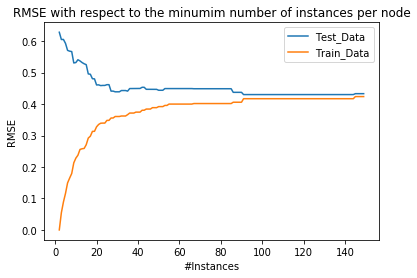

In [19]:
# Min Samples Split 

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(2,150):
   
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_split=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(2,150),RMSE_test,label='Test_Data')
ax0.plot(range(2,150),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


A range between 60 and 95 for Min_Samples_Split could yield a better result, because the RMSE of Training and Testing data seems to be close to each other. Also, We see that beyond 95, the RMSE for test and train seems to be constant.

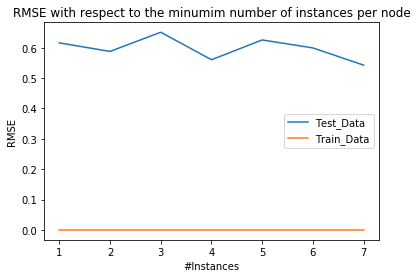

In [20]:
# Max Features

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,8):
   
    regression_model = DecisionTreeRegressor(criterion="mse",max_features=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(1,8),RMSE_test,label='Test_Data')
ax0.plot(range(1,8),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


It is evdient that the Max_Features doesn't have any impact on RMSE. But Max Features = 4, seems to perform better

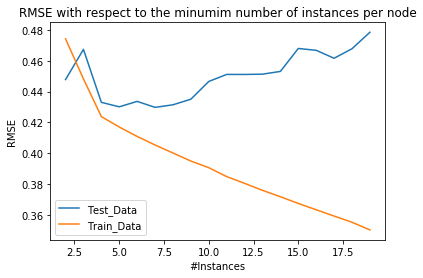

In [22]:
# Max Leaf Nodes

from sklearn.tree import DecisionTreeRegressor

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(2,20):
   
    regression_model = DecisionTreeRegressor(criterion="mse", max_leaf_nodes=i)   
    regression_model.fit(training_data2.iloc[:,:-1],training_data2.iloc[:,-1:])
    predicted_train = regression_model.predict(training_data2.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data2.iloc[:,:-1])

    RMSE_train.append(np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1]))))
   
ax0.plot(range(2,20),RMSE_test,label='Test_Data')
ax0.plot(range(2,20),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


A range between 2 to 8 for Max_Leaf_Nodes could yield a better result, because beyond that the RMSE seems to vary largely.

## Grid Search on the Range of Hyperparameters Obtained 

In [23]:
# Splitting the dataset into the Training set and Test set



from sklearn.cross_validation import train_test_split
training_data2, testing_data2 = train_test_split(result2, test_size = 0.2, random_state = 0)

In [25]:
# Grid Search

from sklearn.model_selection import GridSearchCV
best =  DecisionTreeRegressor(random_state=0,max_features=4 )
regressor55 =  GridSearchCV(best, {"min_samples_leaf": range(20, 45, 2),
                                  "max_depth": np.arange(1, 3),
                                 "min_samples_split": range(60, 95, 2),
                                 "max_leaf_nodes": range(2, 8, 1)})

regressor55.fit(training_data2.iloc[:,:-1], training_data2.iloc[:,-1])    
print('Best Parameters:{}'.format(regressor55.best_params_))
print(regressor55.best_params_)

Best Parameters:{'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 28, 'min_samples_split': 60}
{'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 28, 'min_samples_split': 60}


In [26]:
# Predicting a new result

predicted_train = regressor55.predict(training_data2.iloc[:,:-1])
predicted_test = regressor55.predict(testing_data2.iloc[:,:-1])

# Calculate RMSEs

RMSE3_train = np.sqrt(np.sum(((training_data2.iloc[:,-1]-predicted_train)**2)/len(training_data2.iloc[:,-1])))
RMSE3_test = np.sqrt(np.sum(((testing_data2.iloc[:,-1]-predicted_test)**2)/len(testing_data2.iloc[:,-1])))

print (RMSE3_train)
print (RMSE3_test)


0.44697367074491207
0.47727117779507267


In [27]:
# Calculate MAPE 


MAPE3_train = (np.sum(abs(((training_data2.iloc[:,-1]-predicted_train))/(training_data2.iloc[:,-1]))))/len(training_data2.iloc[:,-1])
MAPE3_test = (np.sum(abs(((testing_data2.iloc[:,-1]-predicted_test))/(testing_data2.iloc[:,-1]))))/len(testing_data2.iloc[:,-1])
print(MAPE3_train)
print(MAPE3_test)

0.07781852721414008
0.0797228292087212


# Model we Propose - Log Transformed (Multicollinearity Removed) with Grid Search For Hyperparmeters




### Hyperparameters Obtained in Grid Search 

Max Depth - 2, Max Leaf Nodes - 6, Min Samples Leaf - 28, Min Samples Split - 60, Max Features - 4

### Root Mean Square Error (RMSE)

The RMSE for the Training Data is 0.4469

The RMSE for the Testing Data is 0.4772 

### Mean Absolute Percentage Error (MAPE)

The Mean Absolute Percentage Error (MAPE) is used as the measure of Accuracy 

MAPE of the Training Data is 7.78%

MAPE of the Testing Data is 7.97%